<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">Fasion MNIST</h1>
</center>


![](https://miro.medium.com/v2/resize:fit:1400/1*-kpgaee9X9Gm-SrQKdk_og.png)

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc).

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> IMPORT LIBRARIES</h1>
</center>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf
import math
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds


/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Reading Dataset</h1>
</center>

In [2]:
dataset,metadata =tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUKVQG4/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUKVQG4/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
class_names=metadata.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Explore the data</h1>
</center>

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, and 10000 images in the test set:

In [4]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

print("Number of training examples : {}".format(num_train_examples))
print("number of testing examples : {}".format(num_test_examples))


Number of training examples : 60000
number of testing examples : 10000


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;">  Preprocess the data</h1>
</center>

The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [5]:
def Normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels


# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset=train_dataset.map(Normalize)
test_dataset=test_dataset.map(Normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Explore the processed data</h1>
</center>

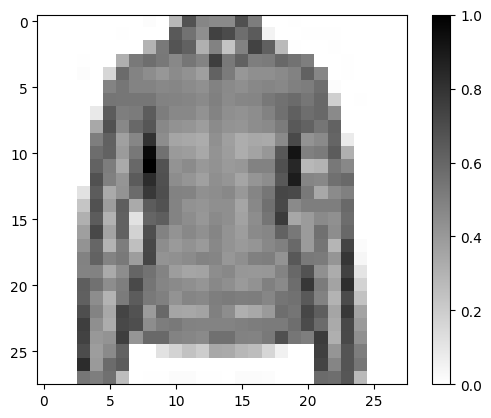

In [6]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()




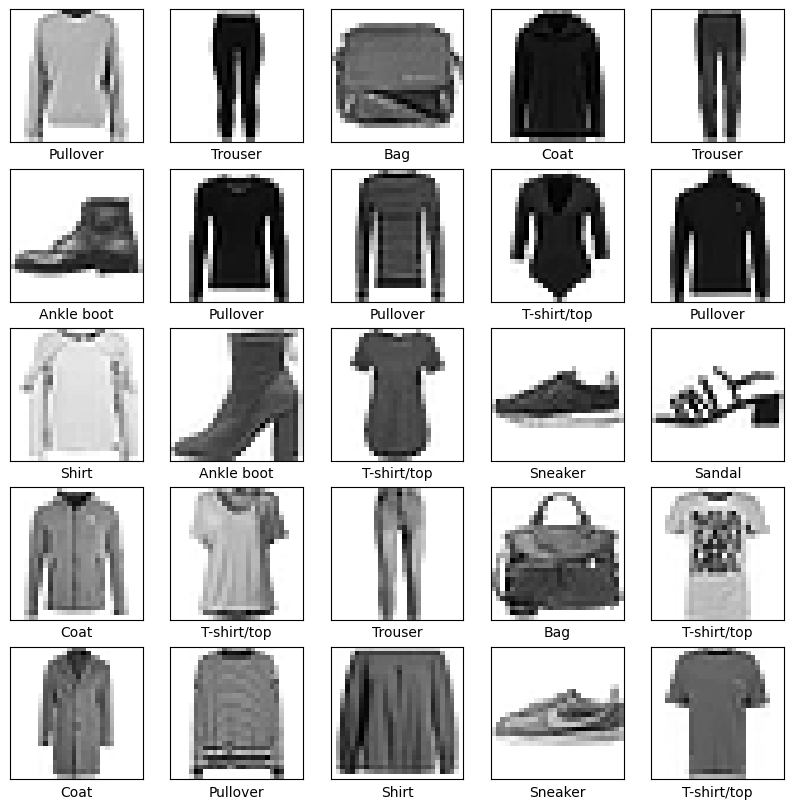

In [7]:
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_dataset.take(25)):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()
    


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Build the model</h1>
</center>

In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)    
])

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Compile the model</h1>
</center>

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Train the model</h1>
</center>

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset,epochs=20,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 38s 18ms/step - loss: 0.4002 - accuracy: 0.8563
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2560 - accuracy: 0.9061
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2125 - accuracy: 0.9214
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1828 - accuracy: 0.9328
Epoch 5/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1507 - accuracy: 0.9438
Epoch 6/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1336 - accuracy: 0.9509
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1094 - accuracy: 0.9590
Epoch 8/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0940 - accuracy: 0.9649
Epoch 9/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0764 - accuracy: 0.9713
Epoch 10/20
1875/1875 [==============================] - 33s 18m

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Evaluate accuracy</h1>
</center>

In [12]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print(f'The accuracy on test dataset is :{test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.5155 - accuracy: 0.9160
The accuracy on test dataset is :0.9160000085830688


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px solid green;"> Make predictions and explore</h1>
</center>

In [13]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 96ms/step


In [14]:
predictions.shape

(32, 10)

In [15]:
predictions[0]

array([3.1878378e-12, 3.9002736e-16, 3.0794938e-05, 1.8209295e-16,
       9.9681360e-01, 1.2770115e-13, 3.1377394e-03, 1.7801916e-05,
       9.8250130e-10, 3.0754840e-11], dtype=float32)

In [16]:
np.argmax(predictions[0])

4

In [17]:
test_labels[0]

4

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

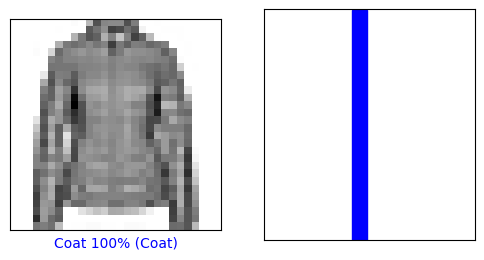

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

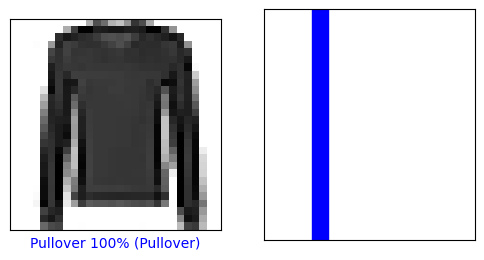

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

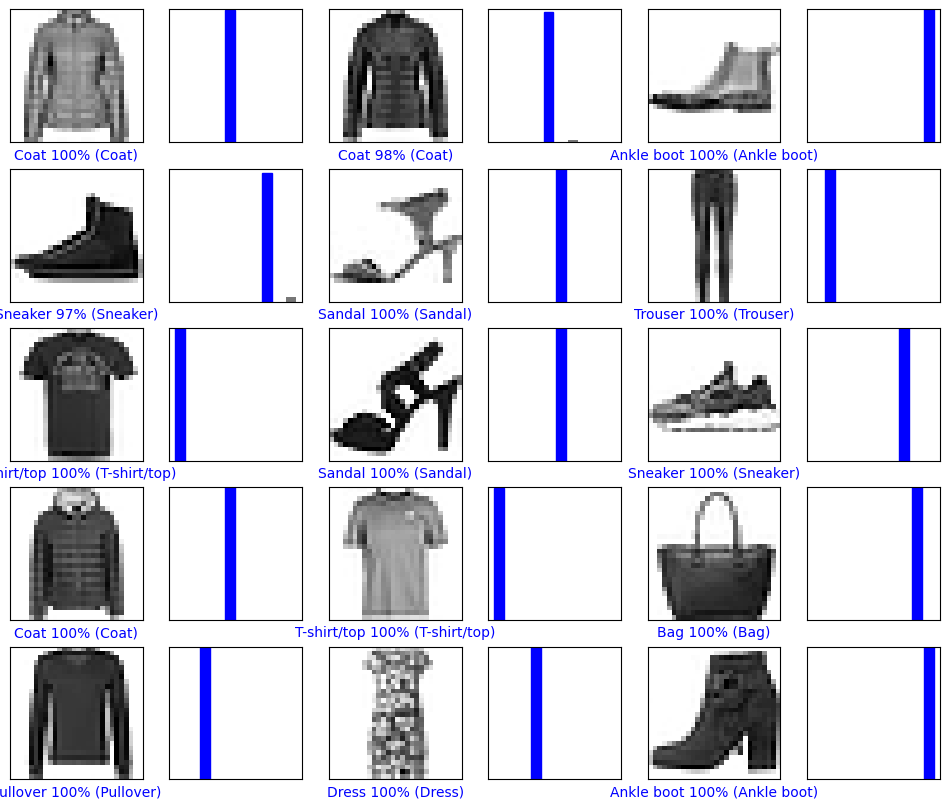

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [23]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 60ms/step
[[3.1878254e-12 3.9002887e-16 3.0794850e-05 1.8209363e-16 9.9681360e-01
  1.2770138e-13 3.1377380e-03 1.7801916e-05 9.8250486e-10 3.0754722e-11]]


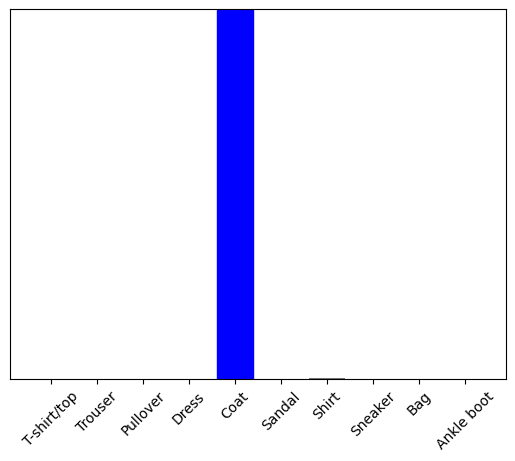

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

4